In [ ]:
from src import LaNoLem, plot_result
from src.Dysts_dataset import Data
import matplotlib.pyplot as plt
import numpy as np
from src import utils
%matplotlib inline

Dataset = Data()
for data_name in Dataset.systems_list:
    data = Dataset.make_each_data(data_name, noise_list=[0.5], seed_list=[42])[0.5][42]
    setting = Dataset.make_setting(data_name)
    model = LaNoLem(verbose=True, print_log=True)
    model.random_state = 42
    model = model.fit(data,fit_type='Robust')
    coef = Dataset.get_true_coefficients(data_name)
    k_nl, _ = utils.get_k_nl(coef.shape[0], 4)
    gt = np.zeros((coef.shape[0], coef.shape[0]+k_nl))
    _, j = np.shape(coef)
    gt[:,:j] = coef.copy()
    w = np.concatenate((model.C @ (model.A - np.eye(model.k)), model.C @ model.F), axis=1)
    w_aug = np.zeros_like(gt)
    w_aug[:, :w.shape[1]] = w
    gt_n = np.linalg.norm(gt, ord='fro')
    plot_result(model, data, setting, fsize=3.3)
    print(np.linalg.norm(gt-w_aug/Dataset.dt, ord='fro')/gt_n)
    plt.show()

In [ ]:
from src import LaNoLem, plot_result
from src.Dysts_dataset import Data
import matplotlib.pyplot as plt
%matplotlib inline

Dataset = Data()
data_name='Chen'
data = Dataset.make_each_data(data_name, noise_list=[0.05], seed_list=[42])[0.05][42]
setting = Dataset.make_setting(data_name)
model = LaNoLem(verbose=True, print_log=True)
model.random_state = 42
model = model.fit(data,fit_type='Robust', max_iter=50)
plot_result(model, data, setting, fsize=3.3)
plt.show()

In [ ]:
model.R

In [ ]:
import tools as tl
import os

tl.paper_for_correction(os.path.expanduser('~/test.zip'), os.path.expanduser('~/test_correct'),
    abstract_name='000abstract', 
    sec_list=['010intro', '020related', '030model', '040proposed', '050experiments',
              '060limitations', '070conclusion'],
    appendix_name='0A_appendix'
    )

In [9]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import yaml
plt.rcParams['axes.xmargin'] = 0 
df = pd.read_csv("./dataset/googletrends/outdoor.csv", index_col=0)
## outdoor
df1 = df.drop(['month', 'Climbing'], axis=1)
ss = preprocessing.StandardScaler()
df1 = pd.DataFrame(ss.fit_transform(df1.values), columns=df1.columns)
df1['month'] = pd.to_datetime(df['month'])
df = df1[(df1['month'] <= "2014-12") & (df1['month'] >= "2010-4")].drop('month',axis=1).copy()
for name in df.columns:
    if name == 'month': continue
    df[name] = df1[name].rolling(4).mean()
df['month'] = df1['month']
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
index_df = df['month'].copy()
df.drop(['month'], axis=1, inplace=True)

data = df.values # - np.min(df.values, axis=0, keepdims=True)
dataset_name = 'g_outdoor_m'
with open(f'./settings/format.yaml') as file:
        setting = yaml.safe_load(file)

100%|██████████| 10/10 [00:13<00:00,  1.37s/it]


{'hyper_param': (3, 50.0, False), 'dim_poly': [2], 'loss': -2366.7423905473834, 'mdl': 10000000000.0, 'mdl_s': 2081.660782179297, 'err': 1.1124944990325372}
loss: -2366.7423905473834, mdl: 2081.660782179297
lambda: 50.0
process time: 3.246026785
dim: 2, k: 3
iter_num: 49


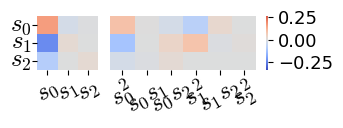

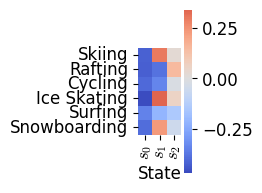

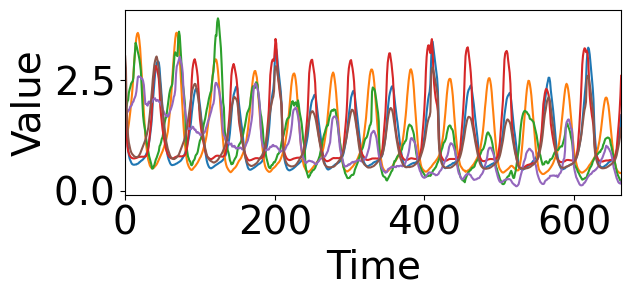

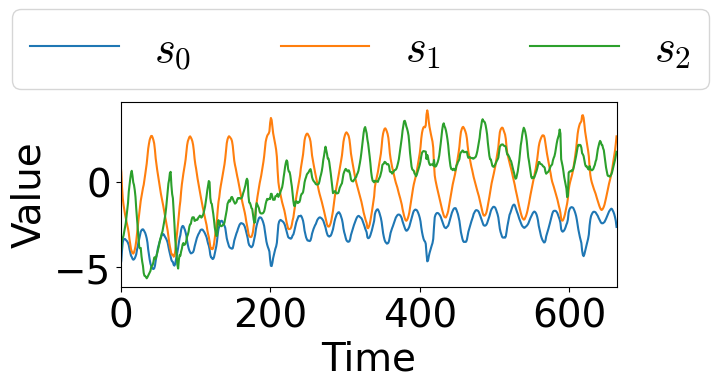

In [1]:
from src import LaNoLem, plot_result, make_data
import matplotlib.pyplot as plt
%matplotlib inline
data_name = 'outdoor'
data, setting = make_data.make_data(data_name)
model = LaNoLem(verbose=True, ptol=1e-10, print_log=True)
model.random_state = 42
model = model.fit(data, k = 3, lams=[1.0, 5.0, 1e+1, 5e+1, 1e+2],
                  fit_type='Latent', max_iter=50)
plot_result(model, data, setting, fsize=3.3)

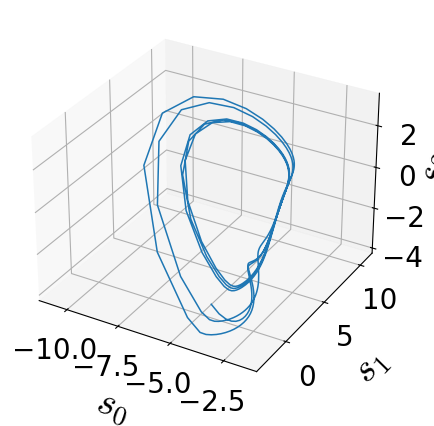

In [2]:
%matplotlib inline
plt.style.use('seaborn-v0_8-paper')
plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize=(12, 6))
Sta, _ = model.gen()
x = Sta[:, 0]
y = Sta[:, 1]
z = Sta[:, 2]
# 位相平面
ax = fig.add_subplot(122, projection='3d')
ax.plot(x, y, z, lw=1.1)
ax.set_xlabel('$s_0$', labelpad=15, fontsize=28)
ax.set_ylabel('$s_1$', labelpad=15, fontsize=28)
ax.set_zlabel('$s_2$', labelpad=15, fontsize=28)
ax.tick_params(labelsize=20)
ax.zaxis.labelpad = 5
plt.subplots_adjust(left=0.001, right=0.8, top=0.9, bottom=0.1)
plt.tight_layout(rect=[0.05, 0.05, 0.8, 1.0])
plt.savefig(f"result/Latent/outdoor/latent_state.pdf", bbox_inches='tight', pad_inches=0.5, transparent=True)
plt.show()

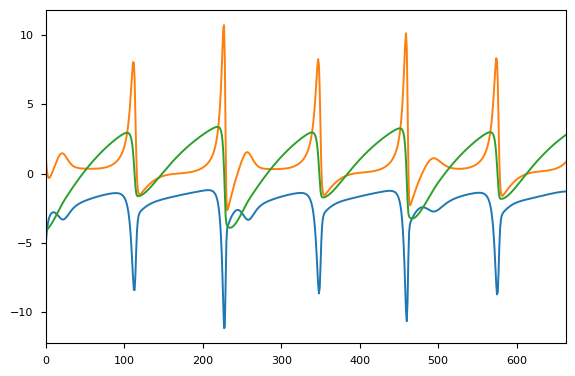

In [3]:
import matplotlib.pyplot as plt

plt.plot(model.gen()[0])

100%|██████████| 14/14 [00:05<00:00,  2.36it/s]


{'hyper_param': (3, 10.0, False), 'dim_poly': [2], 'loss': 2901.9289831582882, 'mdl': 6223.778494961695, 'err': 5.733325600589745, 'err_f': 5.733325600589745}
loss: 2901.9289831582882, mdl: 6223.778494961695
lambda: 10.0
process time: 1.2606314390000009
dim: 2, k: 3
iter_num: 30


/opt/home/ren/LaNoLem/.venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/opt/home/ren/LaNoLem/.venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/opt/home/ren/LaNoLem/src/utils.py:223: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(f"./{dir_path}/ground_truth.{fig_type}", bbox_inches='tight', pad_inches=0.1)
/opt/home/ren/LaNoLem/.venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()
/opt/home/ren/LaNoLem/.venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: This figure includes Axes that 

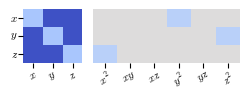

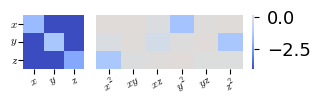

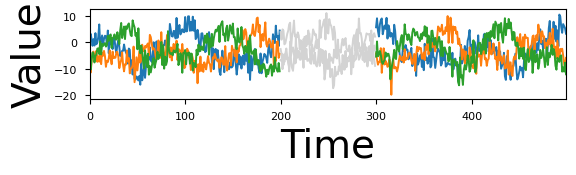

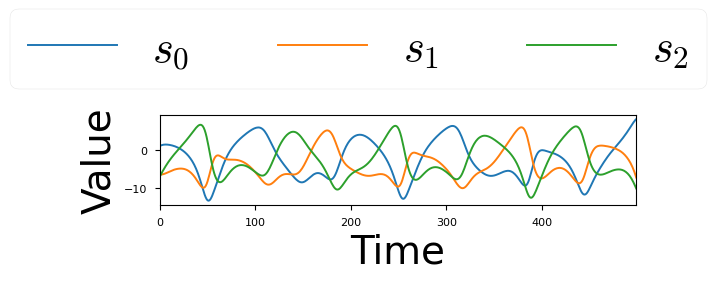

In [4]:
from src.nlds_imp import NLDS
from src.Dysts_dataset import Data
from src.rlds import LDS
from src.utils import plot_result
import numpy as np
import yaml
%matplotlib inline
Dataset = Data()
data_name = 'Halvorsen'
data = Dataset.make_each_data(data_name, noise_list=[0.5], seed_list=[42])[0.5][42]
setting = Dataset.make_setting(data_name)
# with open(f'./settings/format.yaml') as file:
#         setting = yaml.safe_load(file)
# setting['data_name'] = 'mocap'
# seqfn="./data/mocap/21_01.amc.4d"
# data=tl.loadsq(seqfn).T
# data=tl.normalizeZ(data)


missing = np.full(len(data), True)
missing[200:300] = False

# data, setting = make_data(data_name, noise_ratio=0.5, random_state=42)
l_model = LDS(verbose=True, print_log=True)
l_model = l_model.fit(data, missing)

model = NLDS(verbose=True, print_log=True)
model.random_state = 42
model = model.fit(data, missing, fit_type='Robust', max_iter=50)
plot_result(model, data, setting, fsize=3.3, missing = missing)
# plt.show()


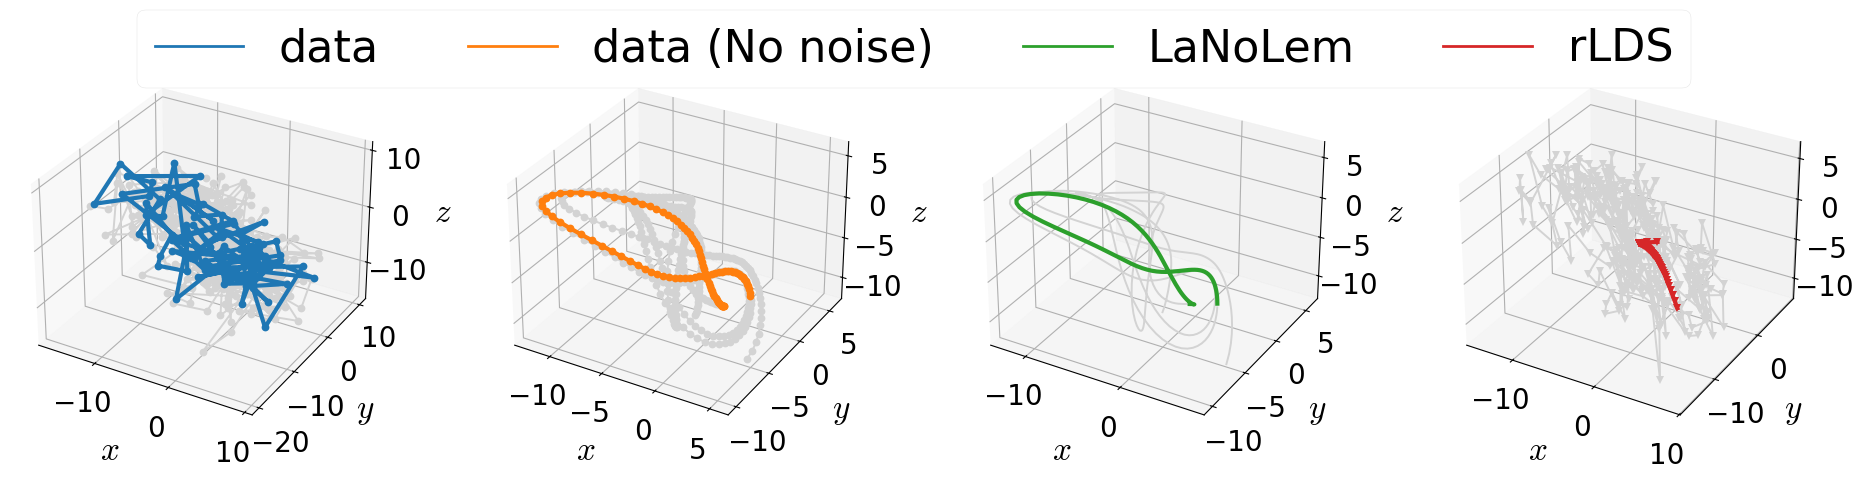

In [5]:
import numpy as np
import pandas as pd
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-paper')
time = np.arange(len(data))
data_nan = data.copy()
data_nan[~missing] = np.nan
# データフレームに変換
dim_list = [f'Dim{i+1}' for i in range(data.shape[1])]
df = pd.DataFrame(data_nan, columns=dim_list)
df['Time'] = time

# 補完のための関数
def cubic_spline_interpolation(df, col_name):
    # 欠損値を含まない時間とデータ
    valid = df[~df[col_name].isna()]
    time_valid = valid['Time']
    data_valid = valid[col_name]
    
    # 補完対象の時間
    time_all = df['Time']
    
    # 3次スプライン補完
    cs = CubicSpline(time_valid, data_valid, bc_type='natural')
    
    # 補完値を計算
    df[col_name] = df['Time'].apply(lambda x: cs(x) if pd.isna(df.loc[df['Time'] == x, col_name].values[0]) else df.loc[df['Time'] == x, col_name].values[0])

# 各次元に対して補完を実施
for dim in dim_list:
    cubic_spline_interpolation(df, dim)


def plot(data, missing, marker, title, x, i, fig):
    ax = fig.add_subplot(x, projection='3d')
    data_miss = data.copy()
    data_miss[missing] = np.nan
    data_no_miss = data.copy()
    data_no_miss[~missing] = np.nan
    ax.plot(data_no_miss[:, 0], data_no_miss[:, 1], data_no_miss[:, 2], marker=marker, color='lightgray')
    cmap = plt.get_cmap("tab10")
    ax.plot(data_miss[:, 0], data_miss[:, 1], data_miss[:, 2], marker=marker, color=cmap(i), lw=3.0)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel('$x$', labelpad=15, fontsize=24)
    ax.set_ylabel('$y$', labelpad=15, fontsize=24)
    ax.set_zlabel('$z$', labelpad=12, fontsize=24)
    # ax.set_title(title, fontsize=24)

plt.rcParams.update({'font.size': 64})
fig = plt.figure(figsize=(20, 10))
# for i in range(data.shape[1]):
    # 結果をプロット
    
plot(data, missing, 'o', 'data', 141, 0, fig)
data_no_noise = Dataset.make_each_data(data_name, noise_list=[0.0], seed_list=[42])[0.0][42]
plot(data_no_noise, missing, 'o', 'data (No noise)', 142, 1, fig)
plot(model.Ez, missing, 'x', 'LaNoLem', 143, 2, fig)
# plot(df[f'Dim{i+1}'], missing, '*', 'Cubic')
plot(l_model.Ez, missing, 'v', 'rLDS', 144, 3, fig)
    # if i == 0:
    
cmap = plt.get_cmap("tab10")
lines = [
    plt.Line2D([0], [0], color=cmap(0), lw=2),
    plt.Line2D([0], [0], color=cmap(1), lw=2),
    plt.Line2D([0], [0], color=cmap(2), lw=2),
    plt.Line2D([0], [0], color=cmap(3), lw=2)
]

labels = ['data', 'data (No noise)', 'LaNoLem', 'rLDS']

fig.legend(lines, labels, loc='center', bbox_to_anchor=(.5, 0.7), ncol=4, fontsize=32)
# plt.legend(loc='lower center', bbox_to_anchor=(.5, 1.1), ncol=4)
    # plt.xlim(200,500)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.savefig(f"result/imp/result.pdf", bbox_inches='tight', pad_inches=0.1)
plt.show()


    

In [ ]:
import numpy as np
import tensorly as tl
from tensorly.decomposition import parafac
from tensorly.decomposition import non_negative_parafac
from scipy.linalg import norm

# テンソルのサイズと遅延埋め込みの設定
def create_tensor_with_missing_values(shape, missing_rate=0.1):
    """
    指定された形状のテンソルを作成し、欠損値をランダムに設定する。
    """
    tensor = np.random.rand(*shape)
    mask = np.random.rand(*shape) < missing_rate
    tensor[mask] = np.nan
    return tensor, mask

def tensor_to_matrix(tensor, lag):
    """
    テンソルを遅延座標に基づく行列に変換する。
    """
    shape = tensor.shape
    matrix_shape = (shape[0] * lag, shape[1] * shape[2])
    matrix = np.full(matrix_shape, np.nan)
    for i in range(lag):
        matrix[i * shape[1]:(i + 1) * shape[1], :] = tensor[i:shape[0] - lag + i + 1, :, :].reshape((shape[1], -1))
    return matrix

def matrix_to_tensor(matrix, shape, lag):
    """
    行列を元のテンソル形状に戻す。
    """
    tensor = np.full(shape, np.nan)
    for i in range(lag):
        tensor[i:shape[0] - lag + i + 1, :, :] = matrix[i * shape[1]:(i + 1) * shape[1], :].reshape((shape[1], shape[2]))
    return tensor

def impute_tensor(tensor, mask, rank=3, n_iter=10):
    """
    テンソル補間を実行する関数。
    """
    # テンソルを遅延行列に変換
    lag = tensor.shape[0] - 1
    matrix = tensor_to_matrix(tensor, lag)
    
    # CP分解
    tensor_kt = tl.tensor(matrix)
    cp_decomp = parafac(tensor_kt, rank=rank, init='random', n_iter=n_iter)
    
    # 補間されたテンソルの作成
    tensor_cp = tl.kruskal_to_tensor(cp_decomp)
    
    # テンソルを元の形状に戻す
    imputed_tensor = matrix_to_tensor(tensor_cp, tensor.shape, lag)
    
    # 欠損値の補間
    tensor[~mask] = imputed_tensor[~mask]
    return tensor

# 主な設定
shape = (20, 5, 5)  # テンソルの形状
lag = 3            # 遅延埋め込みの遅延数
rank = 3           # CP分解のランク
missing_rate = 0.1 # 欠損値の率

# テンソルの生成と欠損値のマスク
tensor, mask = create_tensor_with_missing_values(shape, missing_rate)

# 欠損値の補間
imputed_tensor = impute_tensor(tensor, np.isnan(tensor), rank=rank)

# 結果の表示
print("Original Tensor with Missing Values:")
print(tensor)
print("\nImputed Tensor:")
print(imputed_tensor)
